In [3]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

In [4]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 7s 2us/step


In [5]:
train_data[0].shape

(28, 28)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

ModuleNotFoundError: No module named 'matplotlib'

**Building Model**

It seems our input images are in 28*28 shape. And our model has 10 classes. For multiclass problem we can use tf.keras.losses.CategoricalCrosstentropy() function as our loss function, for hidden layer activation function we can use Relu activation and for our output layer activation function we should use Softmax for multiclass. In case of optimizer we can use SGD or Adam. 


If labels are one hot encoded use tf.keras.losses.CategoricalCrosstentropy(), if labels are integer then use tf.keras.losses.SparseCategoricalCrosstentropy() 

In [ ]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(10,activation='relu'),
        tf.keras.layers.Dense(10,activation='relu'),
        tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)

])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

non_norm_history=model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 2.3501 - accuracy: 0.1653 - val_loss: 1.7142 - val_accuracy: 0.2460
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6279 - accuracy: 0.3047 - val_loss: 1.5481 - val_accuracy: 0.3478
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5472 - accuracy: 0.3471 - val_loss: 1.5198 - val_accuracy: 0.3551
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5143 - accuracy: 0.3585 - val_loss: 1.5156 - val_accuracy: 0.3626
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4629 - accuracy: 0.3888 - val_loss: 1.5052 - val_accuracy: 0.3792
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3286 - accuracy: 0.4378 - val_loss: 1.2957 - val_accuracy: 0.4642
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2673 - accuracy: 0.4541 - val_loss: 1.2778 - val_accuracy:

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data.min(),train_data.max()

(0, 255)

Lets do normalization

In [ ]:
train_data_norm=train_data/train_data.max()
test_data_norm=test_data/train_data.max()

In [ ]:
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

Lets fit our model with the normalized data

In [ ]:
norm_history=model_1.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2333 - accuracy: 0.5635 - val_loss: 0.7785 - val_accuracy: 0.7247
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.7665 - val_loss: 0.6297 - val_accuracy: 0.7794
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5740 - accuracy: 0.8006 - val_loss: 0.5764 - val_accuracy: 0.7988
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5312 - accuracy: 0.8156 - val_loss: 0.5429 - val_accuracy: 0.8113
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5018 - accuracy: 0.8241 - val_loss: 0.5373 - val_accuracy: 0.8095
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4860 - accuracy: 0.8307 - val_loss: 0.5189 - val_accuracy: 0.8169
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4735 - accuracy: 0.8353 - val_loss: 0.5383 - val_accuracy:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Normalized Data'}>

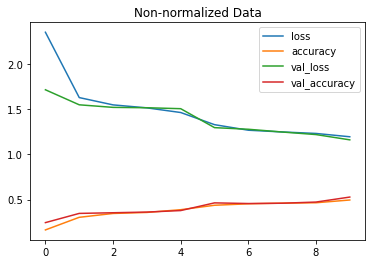

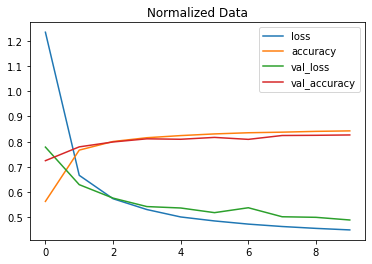

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

Seems with normalizing the data our model has performed a lot better than the non normalized data. 

***Evaluating Our Model***

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
y_probs = model_1.predict(test_data_norm)

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

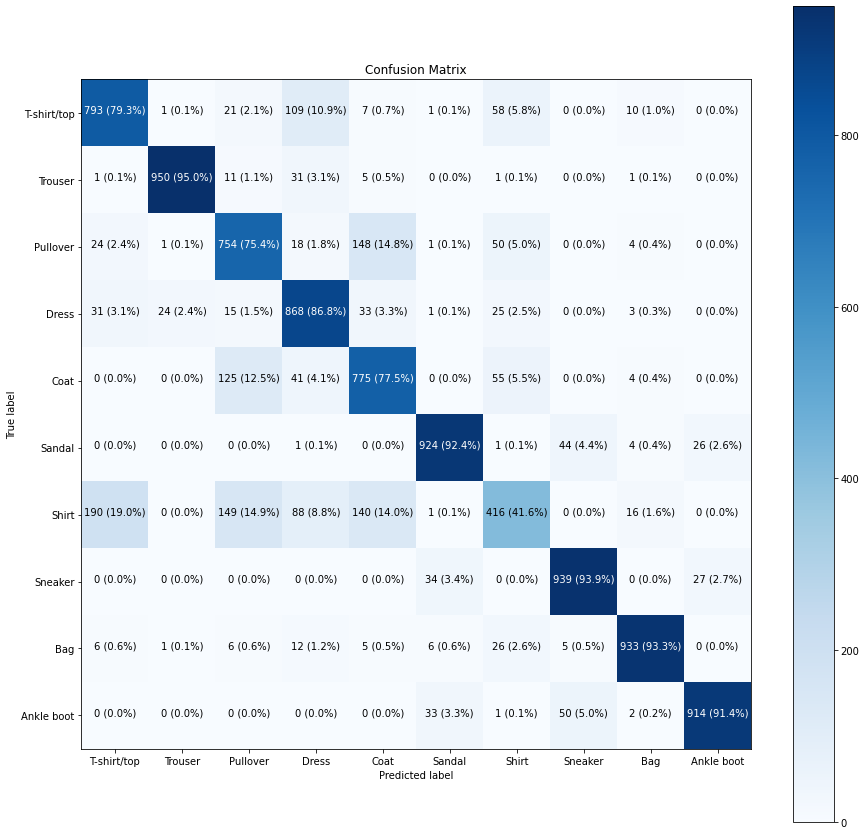

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

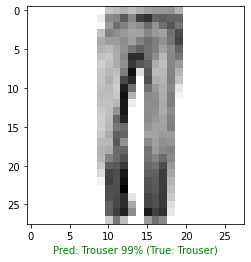

In [ ]:
plot_random_image(model=model_1,images=test_data,true_labels=test_labels,classes=class_names)